# Assignment 6: Trees

## BUS 20800: Big Data
## Due: 11:59 am on May 13, 2022

In [1]:
# Set up codes

import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.5)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Problem 1. Tree method in Classification

In this exercise, we will revisit the moon shape, circle shape, and the balanced linearly separable data in Assignment 2. Now use CART and Random Forest to redo the classification task and visualize the decision boundary. Compare the results with K-nn.

## Part I. Data Generating Processs (DGP)

Run the following codes to get the moon shape, circle shape, and balanced linearly separable data. They are stored in a dictionary structure named 'datasets'.

You don't need to modify any codes here.

In [2]:
from sklearn.datasets import make_moons, make_circles,make_blobs


h = 0.02  # step size in the mesh

n_samples = 1500

datasets = [
    make_moons(n_samples=n_samples,noise=0.05, random_state=0),
    make_circles(n_samples=n_samples,noise=0.05, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-4,4))

]

## Part II. Initialize the classifiers

Run the following codes to initialize the K-nn, CART, and Random Forest classifier. Store them in a dictionary structure named 'classifiers'.

You don't need to modify any codes here.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

names = ["Nearest Neighbors","Decision Tree","Random Forest"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

## Part III. Model training

Finish the codes in the iteration and run the below cells to visualize the decision boundary.


(1) Split the data into training and test set.
(With variable name 'X_train', 'X_test', 'y_train', 'y_test', respectively.)

(2) Train the models.

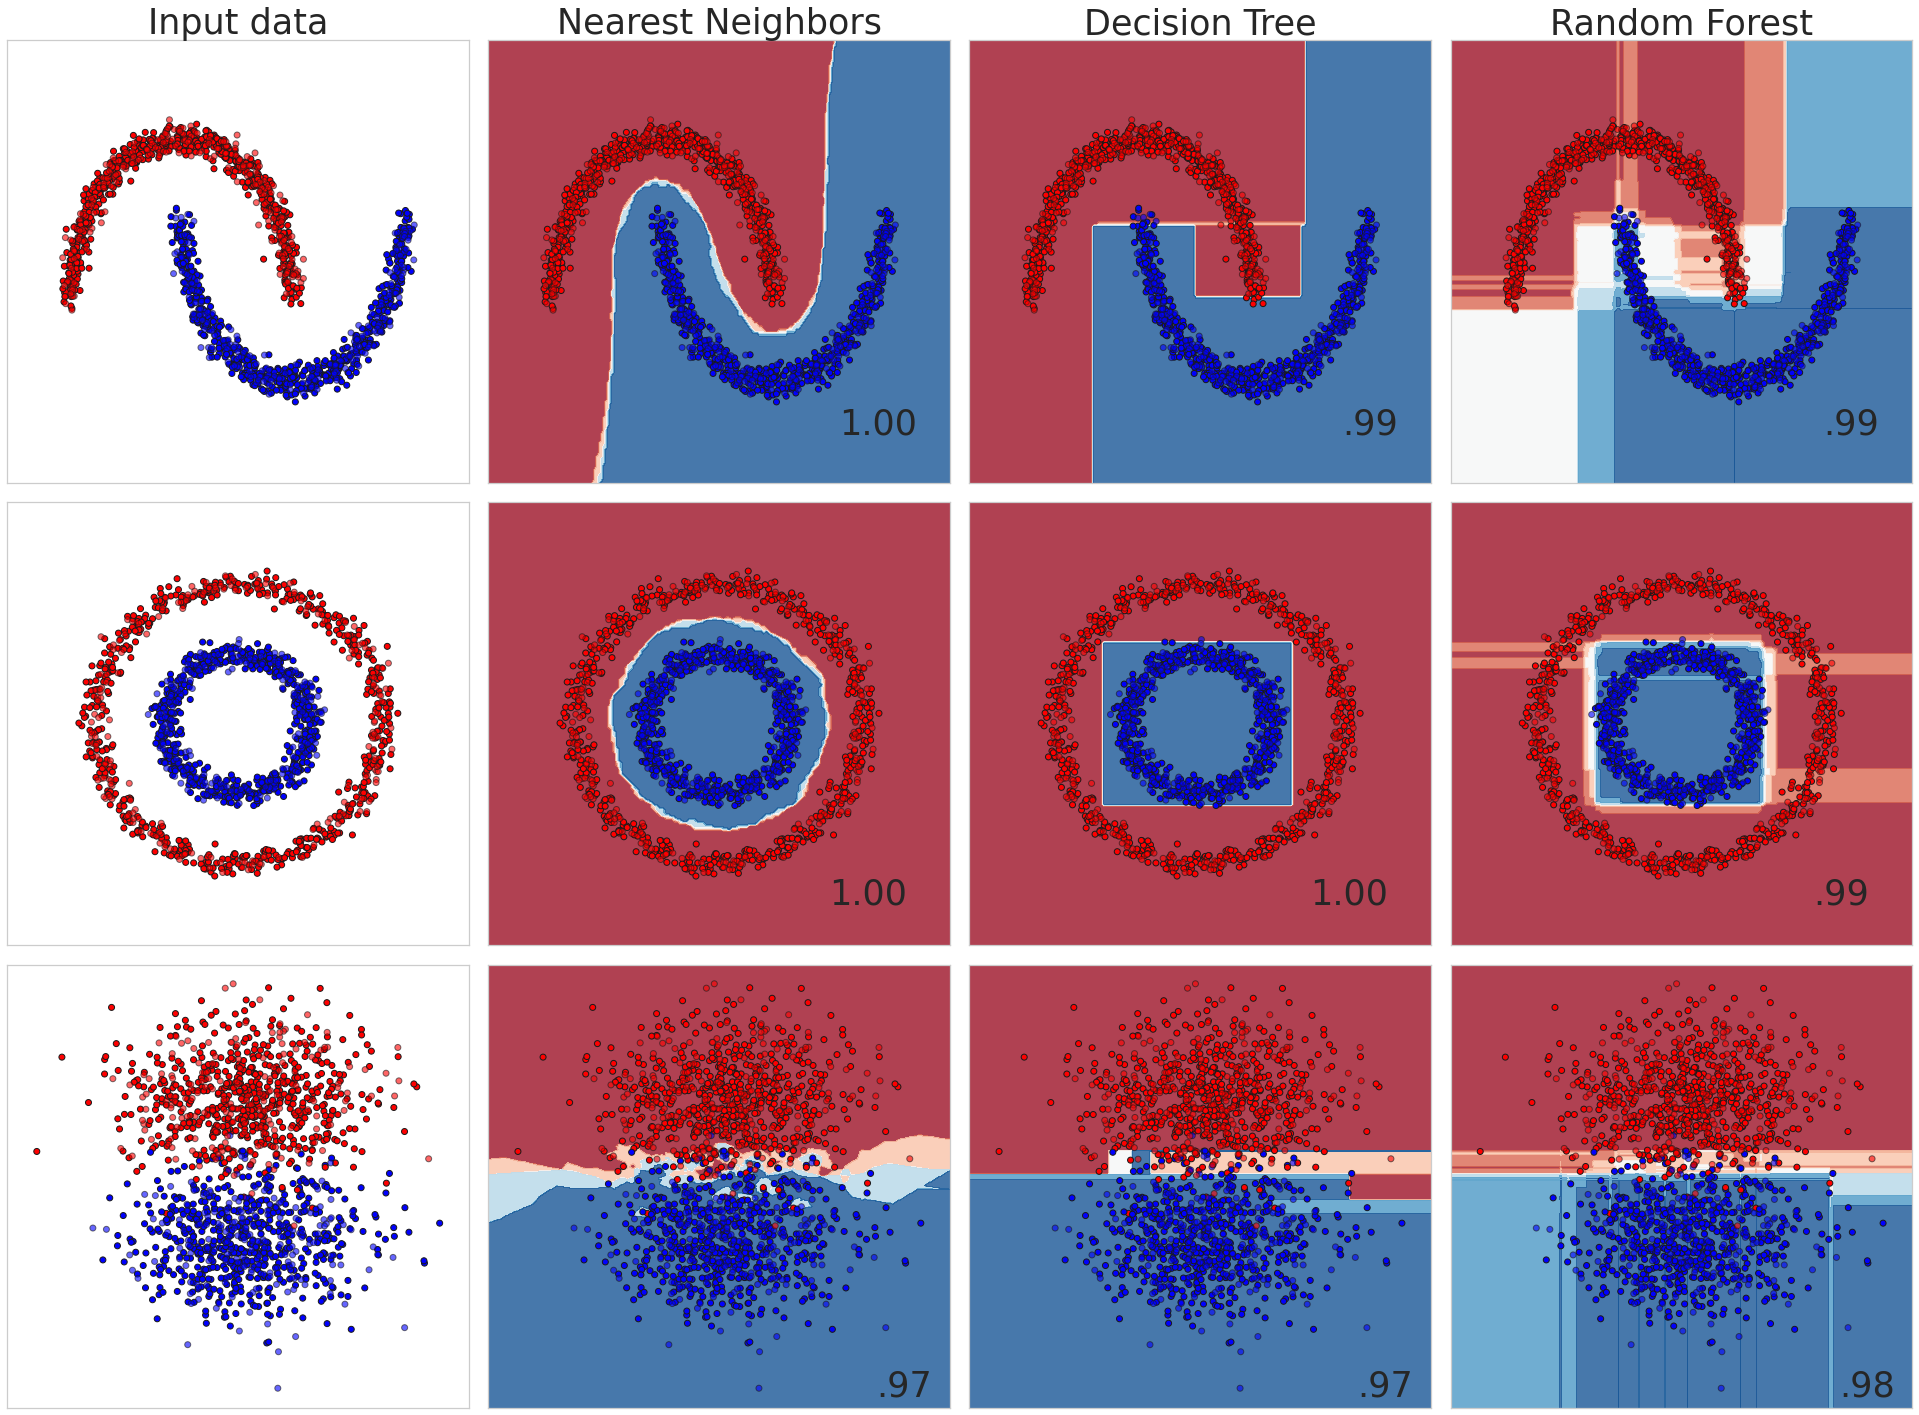

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

figure = plt.figure(figsize=(27, 20))
i = 1

# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    
    X, y = ds # X is the feature and y is the label
    
##############################################################################
### TODO:  Preprocess dataset(named ds), split into training and test part ###
##############################################################################

    X_train, X_test, y_train, y_test = train_test_split(X,y)

##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Visualize the original dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size = 35)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
##############################################################################
### TODO: Train different classifiers and get OOS accuracy                 ###
##############################################################################
        
        clf.fit(X_train,y_train).predict(X_test)
        score = clf.score(X_test, y_test)

##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

        # Plot the decision boundary. 
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else: # Z variable captures the probability which we use for coloring the decision boundaries
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0],X_test[:, 1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=0.6,)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size = 35)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=35,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## Part IV. Findings

Based on the decision boundary you have generated in the above exercise, what conclusion can you make? 


**Answer**:

# Problem 2. Tree method in Regression

In this exercise, you need to use a regression tree to solve a 1D regression problem with some simulated data. 

## Part I. Data Generating Process (DGP)

Run the following codes to generate a sine shape curve with noise. We have separated the training data and test data for you.

You don't need to modify any codes here.

In [ ]:
# DGP
rng = np.random.RandomState(1)
X_train = np.sort(5 * rng.rand(80, 1), axis=0)
y_train = np.sin(X_train).ravel()
y_train[::5] += 3 * (0.5 - rng.rand(16))

rng = np.random.RandomState(10)
X_test = np.sort(5 * rng.rand(40, 1), axis=0)
y_test = np.sin(X_test).ravel()

## Part II. Build a regression tree

Utilize the Regression Tree to fit the training set and evaluate it on the test set with the metrics MSE and R squared.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

##############################################################################
### TODO: Build a regression tree and evaluate its OOS performance.        ###
##############################################################################


# Get prediciton In Sample and OOS
y_pred_IS = 
y_pred_OOS =

# OOS evaluation
MSE = 
r2 = 



print("Mean Squared Error: %f" %(MSE))
print("R2 Score: %f" %(r2))
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

Run the following codes to visualize the In-Sample and OOS prediction results.

You don't need to modify any codes here.

In [ ]:
# In Sample Visualization

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X_train, y_train,label = 'True value')
ax.plot(X_train,y_pred_IS,label = 'Regression Tree')
ax.legend()

plt.show()

In [ ]:
# OOS Visualization

plt.figure(figsize = (10,6))
ax = plt.gca()
ax.plot(X_test, y_test,label = 'True value')
ax.plot(X_test,y_pred_OOS,label = 'Regression Tree')
plt.show()

Based on the above two graphs, what conclusion can you make? Will tree overfit?

## Part III. Trees with different depths

Now redo the exercise in Part II and build regression trees with different max depths. 
Visualize the In-Sample and OOS on the same graph. What conclusions can you make?

In [ ]:
##############################################################################
### TODO: Build regression tress with different depth.                     ###
##############################################################################


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

**Answer**:

# Problem 3. Random Forest and Variable Importance

In this exercise, you need to build a random forest to select the most important variables on a simulated classification task.

## Part I. Data Generating Process (DGP)


Run the following cell to generate the simulated binary-class classification data. 

In this artificial classification data, we have:

+ #n_informative features that are important
+ #n_redundant features that are linear combinations of the informative features.
+ #n_repeated features that are duplicated features, they are drawn randomly from the informative and the redundant features


We have separate the training set and test set for you.


You don't need to modify any codes here.


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

## Part II. Model training

Build a random forest and get the variable importance.

In [ ]:
##############################################################################
### TODO: Build a random forest and get the variable importance.           ###
##############################################################################


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

## Part III. Experiments and Results

Try to set n_informative, n_redundant and n_repeated to different numbers and redo the exercise, what results do you find?

Explain intuitively why Random Forest can be used as a method for feature selection.


**Answer:**

# Problem 4. Breast cancer

In this exercise, you will build a tree based classifier and do some variable selections to prdict the OOS label. 

Run the following codes to get the breast cancer dataset. We have splited the training set and test set for you. 

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X = pd.DataFrame(X, columns = data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Part I. Logistic regreesion

Use logistic regression to do the classification task and report the OOS accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
##############################################################################
### TODO: Use logistic regression to do the classification task and report the OOS accuracy.      ###
##############################################################################


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################


## Part II. CART

Build a decision tree, visualize your tree and report the OOS accuracy.

In [ ]:
##############################################################################
### TODO: Build a decision tree, visualize your tree and report the OOS accuracy.       ###
##############################################################################


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

## Part III. Random Forest

Build a random forest, plot the variable importance and report the OOS accuracy.

In [ ]:
##############################################################################
### TODO: Build a random forest, plot the variable importance and report the OOS accuracy.         ###
##############################################################################


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

## Part IV. Variable selection

Does this dataset has some strong colinearility? Plot the heatmap of the variable correlations. Use this heatmap to explain the variable importance plot you got.